In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

## FUNCTIONS (export as sharknado_functions.py file in same folder, incl. first cell)

In [ ]:
def initial_cleaning(df):
    """
    Removes duplicate rows. Removes columns with data we will not use such as
    source information and files, columns with only missing values. Removes
    rows with 7 missing values or more (50%). Re-indexes the datafile. Sets
    all values to uppercase to account for differences in casing.
    """
    df.drop_duplicates(inplace=True)
    df = df.drop(['Unnamed: 11', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis='columns')
    df = df.dropna(thresh=7)
    df.reset_index(drop=True, inplace=True)
    df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)
    return df

In [ ]:
def column_selection(df):
    """
    Selecting (few) specific columns of interest for the business case. Removing
    rows if they have null values in two key variables for the business case.
    """
    df = df[['Country', 'Type', 'State', 'Activity', "Injury"]]
    df = df.dropna(subset=['Activity', 'State'], how='all')
    return df

In [ ]:
def country_selection(df):
    """
    Further reducing the datafile to top 3 countries with most shark attacks.
    Re-indexing the datafile.
    """
    df = df[df['Country'].isin(["USA", "AUSTRALIA", "SOUTH AFRICA"])]
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
def column_cleaning_state(df):
    """
    Removes leading and trailing whitespaces. Draws on lists with current states
    of the target countries to only keep these for geomapping purposes. Then
    keeps only pre-defined states in the states column, sets all other values
    to null values and then drops rows with these null values as they are
    not useful anymore for further analysis within the business case.
    """
    df['State'] = df['State'].apply(lambda x: x.strip() if isinstance(x, str) else x)

    states_USA = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
    states_AUSTRALIA = ["New South Wales", "Victoria", "Queensland", "Western Australia", "South Australia", "Tasmania"]
    states_SOUTH_AFRICA = ["Kwazulu-natal", "Western Cape Province", "Eastern Cape Province", "Free State", "Gauteng", "Limpopo", "Mpumalanga", "Northern Cape", "North West"]
    all_the_states = states_USA + states_AUSTRALIA + states_SOUTH_AFRICA
    all_the_states_upper = list(map(lambda x: x.upper(), all_the_states))
    df['State'] = df['State'].apply(lambda x: x.upper() if x in all_the_states_upper else None)
    df = df.dropna(subset=['State'])
    return df

In [ ]:
def column_cleaning_type(df):
    """
    Unifies values based on the sharkfile author's suggestions. Additionally,
    creates an extra column turning the values into binary format (0/1).
    Missing values will be treated as unprovoked (i.e., only "provoked" when
    there is secure information in place).
    """
    type_mapping_dict = {
    'BOAT': 'WATERCRAFT',
    'INVALID': 'INVALID/QUESTIONABLE',
    'UNCONFIRMED': 'INVALID/QUESTIONABLE',
    'UNVERIFIED': 'INVALID/QUESTIONABLE',
    'QUESTIONABLE': 'INVALID/QUESTIONABLE',
    'UNDER INVESTIGATION': 'INVALID/QUESTIONABLE',
    }
    df['Type'] = df['Type'].apply(lambda x: type_mapping_dict.get(x,x))

    df['Type_binary'] = df['Type'].apply(lambda x: 1 if x == 'PROVOKED' else 0)
    return df

In [ ]:
def column_cleaning_activity(df):
    """
    Removes leading/trailing whitespaces. Subsumes strings containing related
    activities under main categories. Groups remaining values as "other".
    """
    df['Activity'] = df['Activity'].apply(lambda x: x.strip() if isinstance(x, str) else x)

    category_pattern = "SURF"
    similar_activities= set()
    for value in df['Activity']:
        if type(value) == str and value != "SURFING" and re.search(category_pattern, value):
            similar_activities.add(value)
    similar_activities_SURFING = list(similar_activities)
    df['Activity'] = df['Activity'].apply(lambda x: 'SURFING' if x in similar_activities_SURFING else x)

    category_pattern = "BOARDING"
    similar_activities= set()
    for value in df['Activity']:
        if type(value) == str and value != "BOARDING" and re.search(category_pattern, value):
            similar_activities.add(value)
    similar_activities_BOARDING = list(similar_activities)
    df['Activity'] = df['Activity'].apply(lambda x: 'SURFING' if x in similar_activities_BOARDING else x)

    category_pattern = "SWIMMING"
    similar_activities= set()
    for value in df['Activity']:
        if type(value) == str and value != "SWIMMING" and re.search(category_pattern, value):
            similar_activities.add(value)
    similar_activities_SWIMMING = list(similar_activities)
    df['Activity'] = df['Activity'].apply(lambda x: 'SWIMMING' if x in similar_activities_SWIMMING else x)

    category_pattern = "FISHING"
    similar_activities= set()
    for value in df['Activity']:
        if type(value) == str and value != "FISHING" and re.search(category_pattern, value):
            similar_activities.add(value)
    similar_activities_FISHING = list(similar_activities)
    df['Activity'] = df['Activity'].apply(lambda x: 'FISHING' if x in similar_activities_FISHING else x)

    category_pattern = "DIVING"
    similar_activities= set()
    for value in df['Activity']:
        if type(value) == str and value != "DIVING" and re.search(category_pattern, value):
            similar_activities.add(value)
    similar_activities_DIVING = list(similar_activities)
    df['Activity'] = df['Activity'].apply(lambda x: 'DIVING' if x in similar_activities_DIVING else x)

    category_pattern = "SNORKEL"
    similar_activities= set()
    for value in df['Activity']:
        if type(value) == str and value != "SNORKEL" and re.search(category_pattern, value):
            similar_activities.add(value)
    similar_activities_SNORKELING = list(similar_activities)
    df['Activity'] = df['Activity'].apply(lambda x: 'DIVING' if x in similar_activities_SNORKELING else x)

    category_pattern = "WADING"
    similar_activities= set()
    for value in df['Activity']:
        if type(value) == str and value != "WADING" and re.search(category_pattern, value):
            similar_activities.add(value)
    similar_activities_WADING = list(similar_activities)
    df['Activity'] = df['Activity'].apply(lambda x: 'SHALLOW WATER' if (x in similar_activities_WADING or x == 'WADING') else x)

    category_pattern = "STANDING"
    similar_activities= set()
    for value in df['Activity']:
        if type(value) == str and value != "STANDING" and re.search(category_pattern, value):
            similar_activities.add(value)
    similar_activities_STANDING = list(similar_activities)
    df['Activity'] = df['Activity'].apply(lambda x: 'SHALLOW WATER' if (x in similar_activities_STANDING or x == 'STANDING') else x)

    category_pattern = "BATHING"
    similar_activities= set()
    for value in df['Activity']:
        if type(value) == str and value != "BATHING" and re.search(category_pattern, value):
            similar_activities.add(value)
    similar_activities_BATHING = list(similar_activities)
    df['Activity'] = df['Activity'].apply(lambda x: 'SHALLOW WATER' if (x in similar_activities_BATHING or x == 'BATHING') else x)

    defined_activities = ['SURFING', 'SWIMMING', 'FISHING', 'DIVING', 'SHALLOW WATER']
    df['Activity'] = df['Activity'].apply(lambda x: 'OTHER' if x not in defined_activities else x)

    return df

In [ ]:
def column_cleaning_injury(df):
    """
    Removes leading/trailing whitespaces. Subsumes strings containing related
    expressions under main categories. Additionally, creates an extra column
    turning the values into binary format (0/1). Missing values will be treated
    as not fatal (i.e., only "fatal" when there is secure information in place.
    """
    df['Injury'] = df['Injury'].apply(lambda x: x.strip() if isinstance(x, str) else x)

    category_pattern = "FATAL"
    similar_expressions= set()
    for value in df['Injury']:
        if type(value) == str and value != "FATAL" and re.search(category_pattern, value):
            similar_expressions.add(value)
    similar_expressions_FATAL = list(similar_expressions)
    df['Injury'] = df['Injury'].apply(lambda x: 'FATAL' if x in similar_expressions_FATAL else x)

    category_pattern = "DEATH"
    similar_expressions= set()
    for value in df['Injury']:
        if type(value) == str and value != "DEATH" and re.search(category_pattern, value):
            similar_expressions.add(value)
    similar_expressions_DEATH = list(similar_expressions)
    df['Injury'] = df['Injury'].apply(lambda x: 'FATAL' if x in similar_expressions_DEATH else x)

    df['Injury_binary'] = df['Injury'].apply(lambda x: 1 if x == 'FATAL' else 0)
    return df

In [ ]:
def final_cleaning(df):
    """
    Drops the (few) last missing values in the dataset.
    """
    df = df.dropna(subset=['Type', 'Injury'])
    return df

In [ ]:
def full_data_cleaning(df):
    """
    Cleanes the data file according to the business case and prepares it for
    exploratory data analysis.
    """
    df = initial_cleaning(df)
    df = column_selection(df)

    df = country_selection(df)
    df = column_cleaning_state(df)
    df = column_cleaning_type(df)
    df = column_cleaning_activity(df)
    df = column_cleaning_injury(df)

    df = final_cleaning(df)
    return df

In [ ]:
def eda(df):
    """
    Plots incident count by activity type. Plots fatalities per country. Prints
    shares of injury types.
    """
    print("Incident count by activity:")
    top_activities = df['Activity'].value_counts().head(10).reset_index()
    top_activities.rename(columns={"index":"Activity Type","Activity":"Incident Count"},inplace=True)
    sns.barplot(top_activities,x = top_activities['Activity Type'],y = top_activities["Incident Count"])
    plt.xticks(rotation=45)
    plt.show()

    print("Fatality count by country:")
    fsa = df[['Country', 'Injury_binary']]
    fatal_fsa = fsa.loc[fsa['Injury_binary'] == 1]
    to_plot = fatal_fsa['Country'].value_counts()
    p = sns.barplot(data=to_plot, x=to_plot.index, y=to_plot.values)
    plt.xticks(range(len(to_plot.index)), to_plot.index)
    plt.show()

    print("Injury types in %:")
    print(df['Injury'].value_counts(normalize=True) * 100)
    print()

## MAIN FILE

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
#import sharknado_functions
df = pd.read_excel(r"https://www.sharkattackfile.net/spreadsheets/GSAF5.xls")

In [ ]:
#df = sharknado_functions.full_data_cleaning(df)
#sharknado_functions.eda(df)

Incident count by activity:


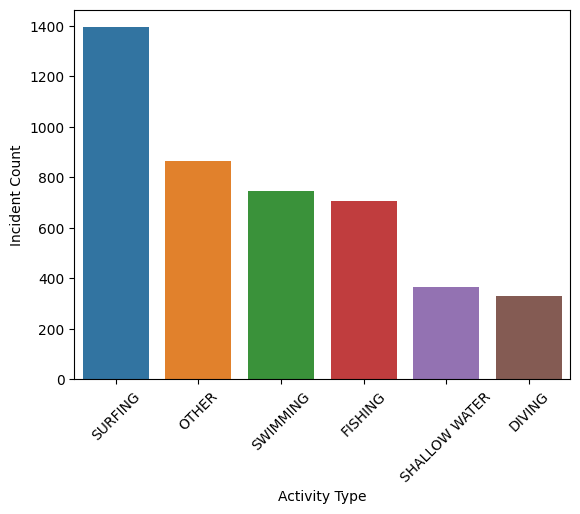

Fatality count by country:


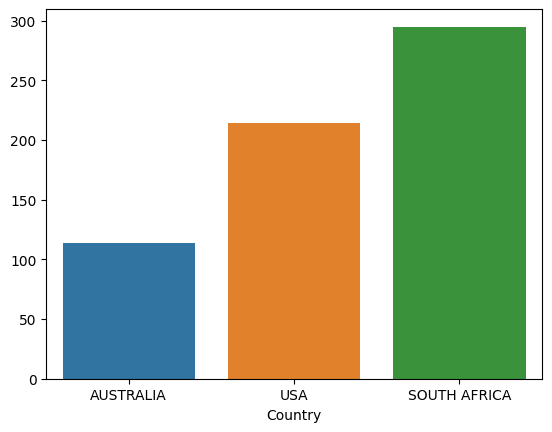

Injury types in %:
FATAL                                                          14.143019
FOOT BITTEN                                                     1.884222
NO INJURY                                                       1.248581
SURVIVED                                                        1.112372
LEFT FOOT BITTEN                                                1.089671
                                                                 ...    
HAND, THIGH & CALF BITTEN BY HOOKED SHARK PROVOKED INCIDENT     0.022701
MINOR INJURIES, SURFBOARD BITTEN                                0.022701
NO INJURY, SHARK REMOVED PIECE OF SURFBOARD                     0.022701
HEAD & TORSO BITTEN                                             0.022701
"LOST LEG"                                                      0.022701
Name: Injury, Length: 2520, dtype: float64



In [ ]:
df = full_data_cleaning(df)
eda(df)